In [ ]:
from google.colab import drive
drive.mount('/content/Drive')

Drive already mounted at /content/Drive; to attempt to forcibly remount, call drive.mount("/content/Drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.set_option('display.max_columns',100)

df = pd.read_excel('/content/Drive/MyDrive/datasets/E Commerce Dataset.xlsx', sheet_name='E Comm')
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


#Understanding the dataset

In [ ]:
df.shape

(5630, 20)

In [ ]:
df.isnull().any()

CustomerID                     False
Churn                          False
Tenure                          True
PreferredLoginDevice           False
CityTier                       False
WarehouseToHome                 True
PreferredPaymentMode           False
Gender                         False
HourSpendOnApp                  True
NumberOfDeviceRegistered       False
PreferedOrderCat               False
SatisfactionScore              False
MaritalStatus                  False
NumberOfAddress                False
Complain                       False
OrderAmountHikeFromlastYear     True
CouponUsed                      True
OrderCount                      True
DaySinceLastOrder               True
CashbackAmount                 False
dtype: bool

In [ ]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

# Data Cleansing

In [ ]:
df_clean = df.copy()

In [ ]:
df_clean.isnull().sum()

CustomerID                       0
Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

In [ ]:
df_clean.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


In [ ]:
for i in df_clean.columns:
    if df_clean[i].isnull().sum() > 0:
        print(i, '->' ,'median : ',df_clean[i].median(),'| mean : ',df_clean[i].mean())
        print()

Tenure -> median :  9.0 | mean :  10.189899366380917

WarehouseToHome -> median :  14.0 | mean :  15.639895891429633

HourSpendOnApp -> median :  3.0 | mean :  2.9315348837209303

OrderAmountHikeFromlastYear -> median :  15.0 | mean :  15.707921714818266

CouponUsed -> median :  1.0 | mean :  1.7510234462225531

OrderCount -> median :  2.0 | mean :  3.0080044676098288

DaySinceLastOrder -> median :  3.0 | mean :  4.543490512868683



In [ ]:
for i in df.columns:
    if df_clean[i].isnull().sum() > 0:
        df_clean[i].fillna(df[i].median(),inplace=True)

In [ ]:
df_clean.isnull().sum()

CustomerID                     0
Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

# Exploratory Data Analysis and Visualization

In [ ]:
df_EDA = df_clean.copy()

In [ ]:
df_EDA.drop(columns="CustomerID", inplace=True)

In [ ]:
df_EDA['Churn'] = df_EDA['Churn'].astype('object')
df_EDA['CityTier'] = df_EDA['CityTier'].astype('object')
df_EDA['Complain'] = df_EDA['Complain'].astype('object')

## Univariate Analysis

In [ ]:
cat_col = []
num_col = []
for column in df_EDA.columns:
    if df_EDA[column].dtype=='object':
        cat_col.append(column)
    else:
        num_col.append(column)

> Categorical Columns

In [ ]:
cat_col

['Churn',
 'PreferredLoginDevice',
 'CityTier',
 'PreferredPaymentMode',
 'Gender',
 'PreferedOrderCat',
 'MaritalStatus',
 'Complain']

In [ ]:
palette = sns.color_palette("Set2")

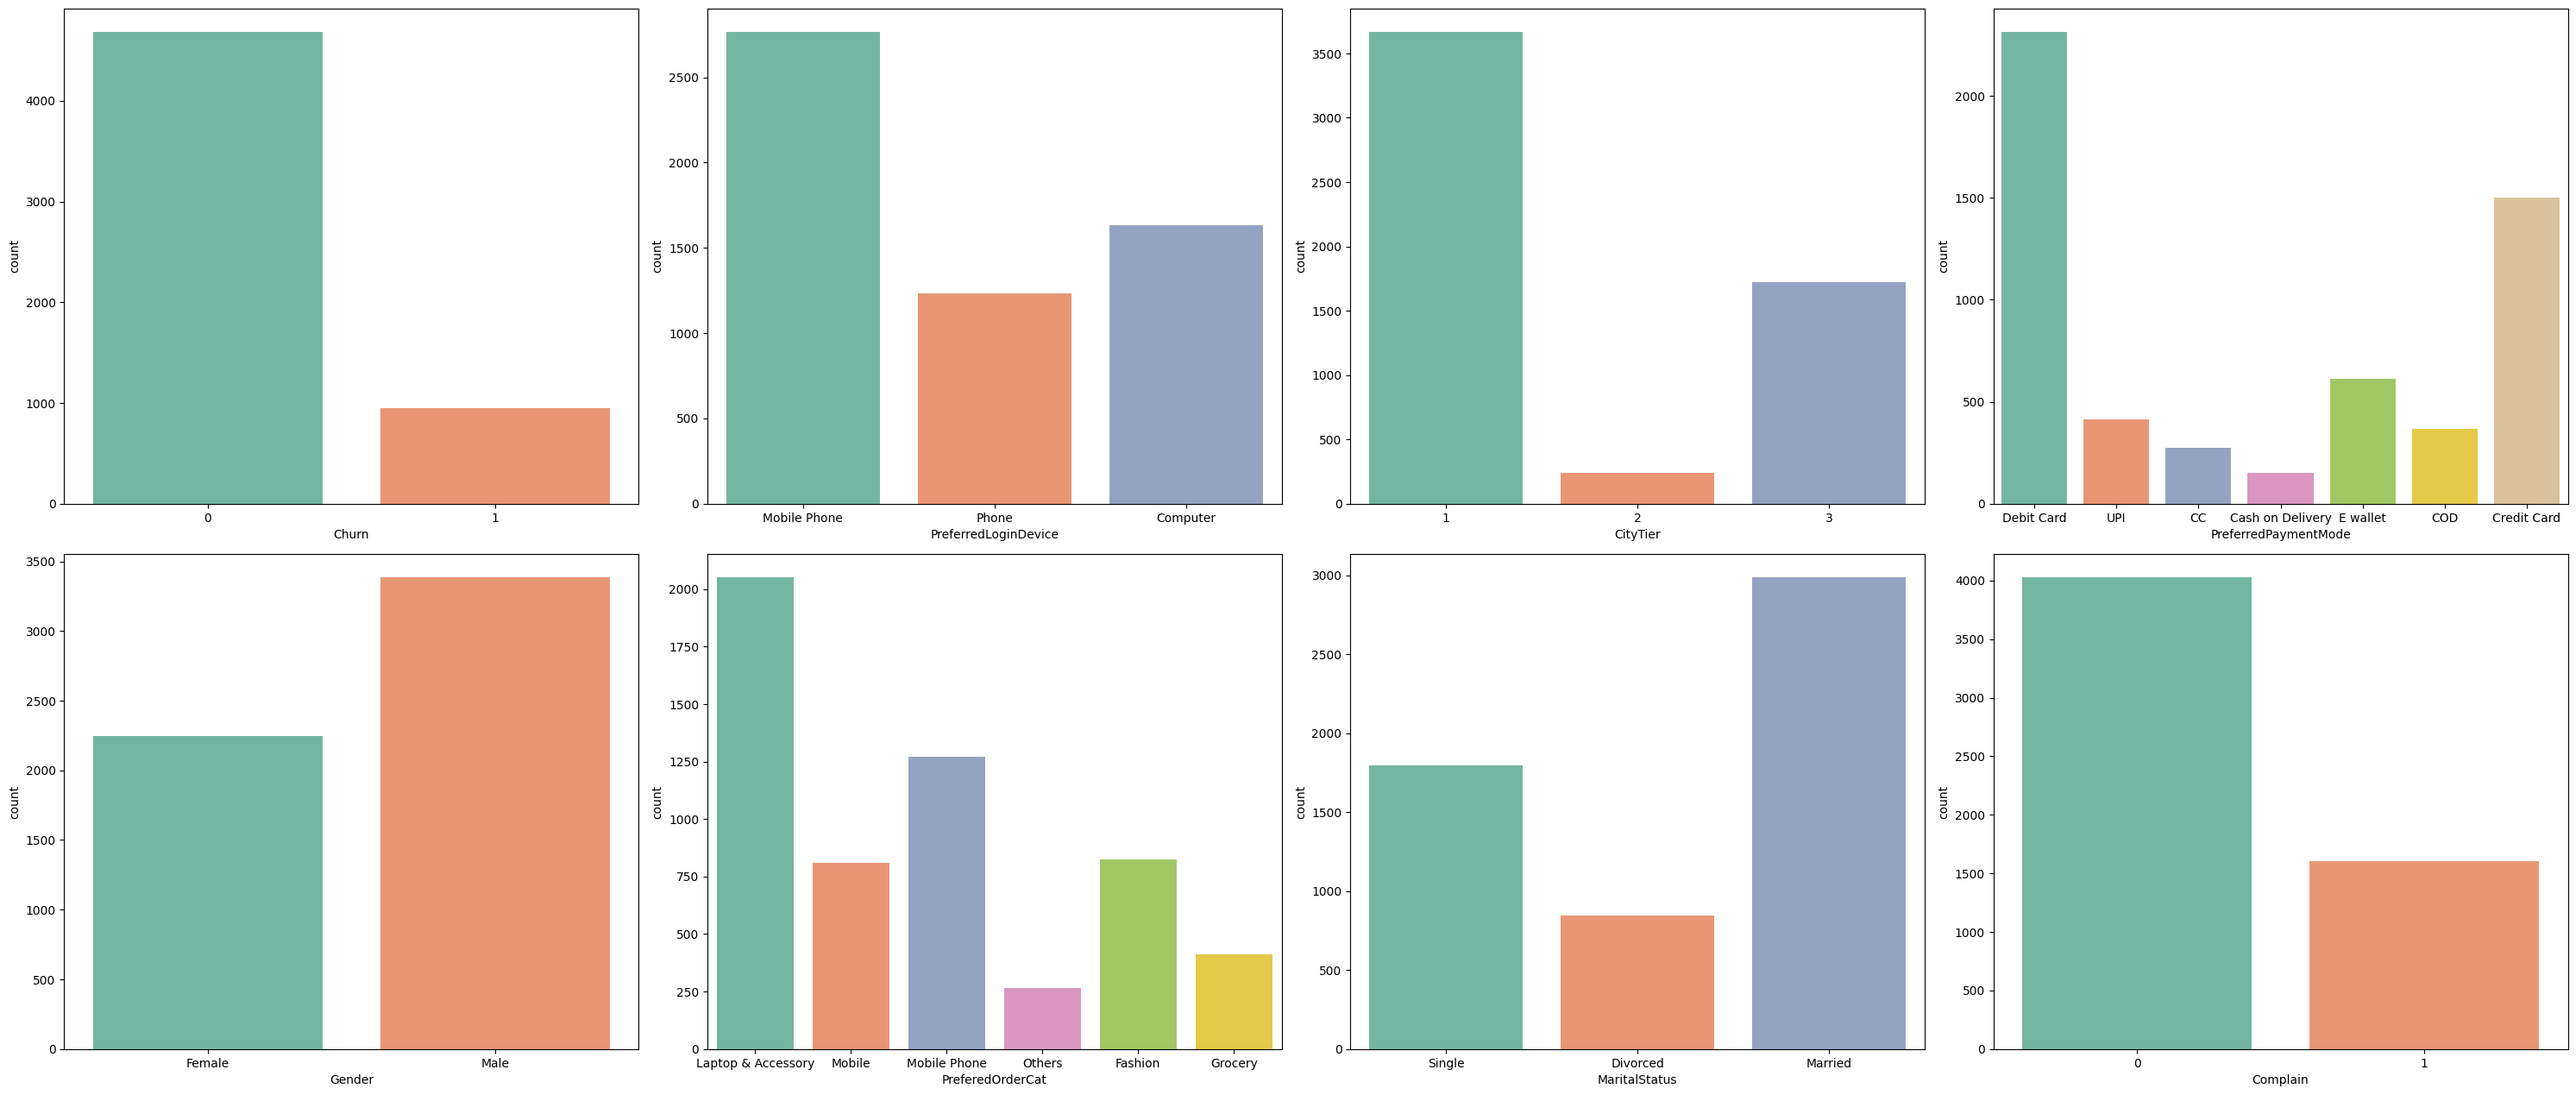

In [ ]:
plt.figure(figsize=(30,25))
plot_num = 1
for col in cat_col:
    plt.subplot(4, 4, plot_num )
    palette = sns.color_palette("Set2", n_colors=df_clean[col].nunique())
    sns.countplot(data=df_clean, x=col, hue=col, palette=palette, legend=False)
    plot_num += 1
plt.tight_layout()
plt.show()

> Numerical Columns

In [ ]:
num_col

['Tenure',
 'WarehouseToHome',
 'HourSpendOnApp',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'OrderAmountHikeFromlastYear',
 'CouponUsed',
 'OrderCount',
 'DaySinceLastOrder',
 'CashbackAmount']

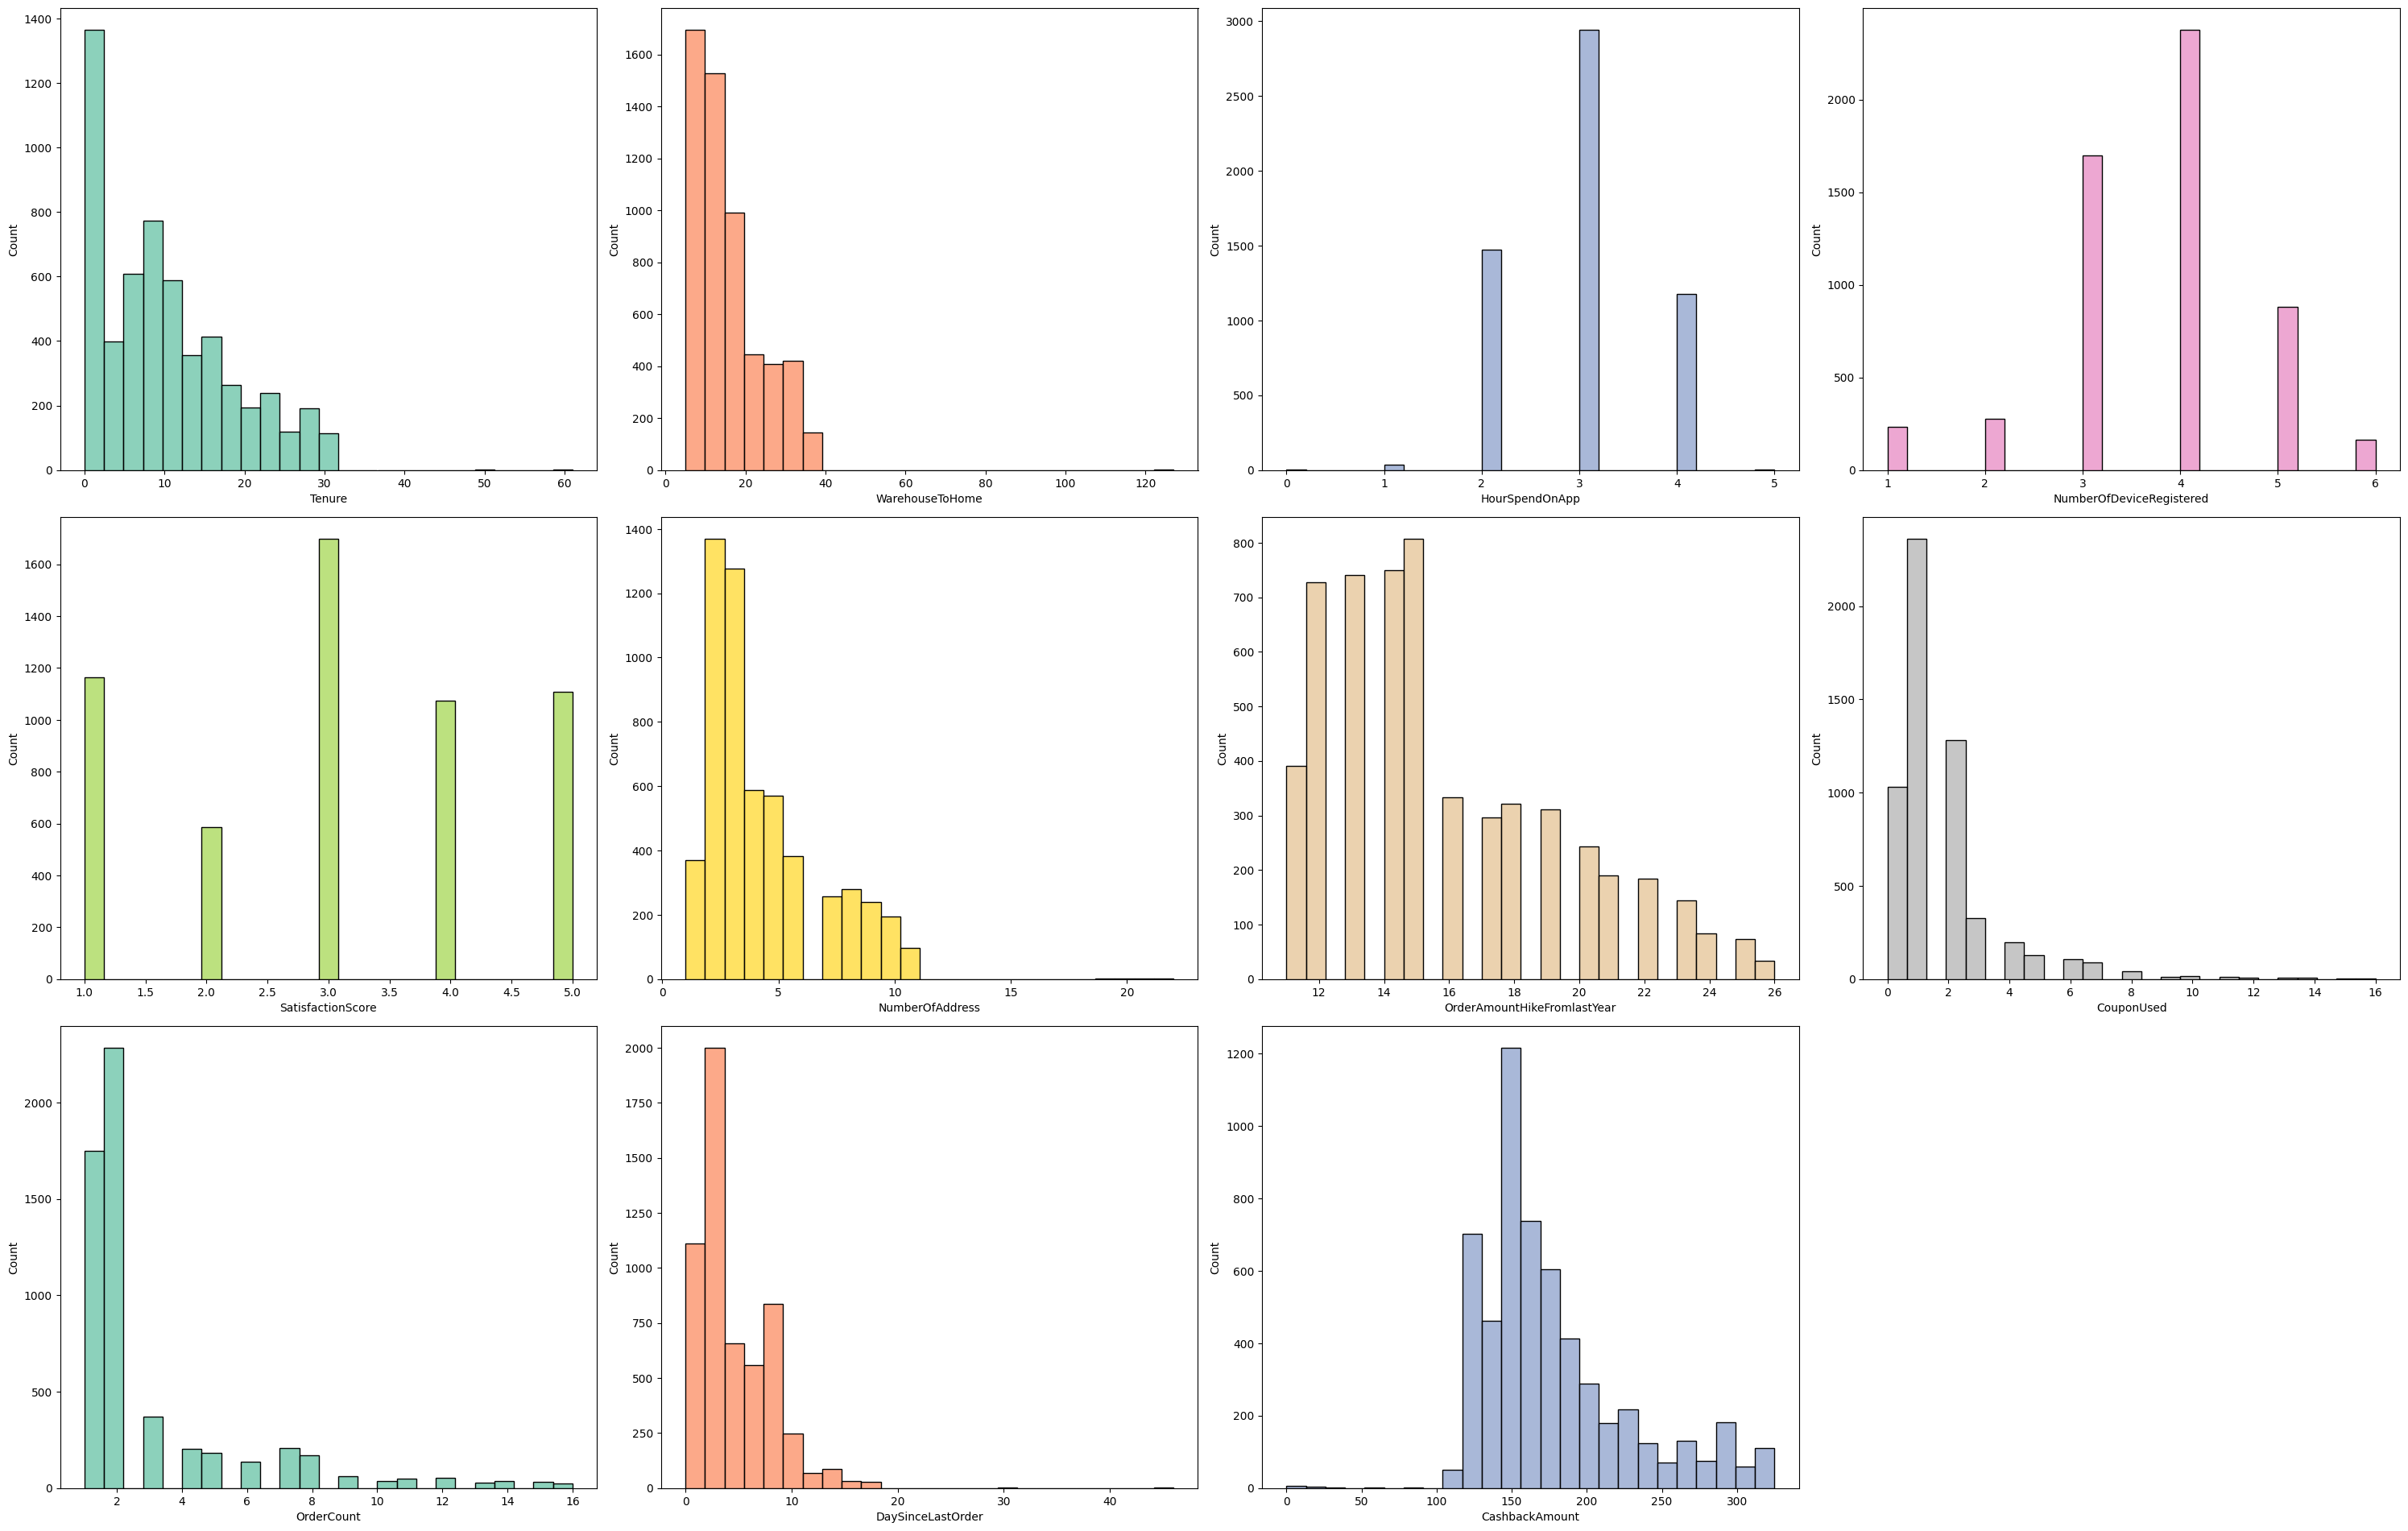

In [ ]:
plt.figure(figsize=(30,25))
plot_num = 1
colors = sns.color_palette("Set2", len(num_col))
plot_num = 1
for col, color in zip(num_col, colors):
    plt.subplot(4, 4, plot_num)
    sns.histplot(data=df_clean, x=col, bins=25, color=color)
    plot_num += 1
plt.tight_layout()
plt.show()

## Churn Analysis

In [ ]:
for col in cat_col:
  crosstab_data = pd.crosstab(df_clean['Churn'],df_clean[col], margins=True)
  print("Crosstab for", cat_col[0])
  print(crosstab_data)
  print()
  print('--------------------------')

Crosstab for Churn
Churn     0    1   All
Churn                 
0      4682    0  4682
1         0  948   948
All    4682  948  5630

--------------------------
Crosstab for Churn
PreferredLoginDevice  Computer  Mobile Phone  Phone   All
Churn                                                    
0                         1310          2417    955  4682
1                          324           348    276   948
All                       1634          2765   1231  5630

--------------------------
Crosstab for Churn
CityTier     1    2     3   All
Churn                          
0         3134  194  1354  4682
1          532   48   368   948
All       3666  242  1722  5630

--------------------------
Crosstab for Churn
PreferredPaymentMode   CC  COD  Cash on Delivery  Credit Card  Debit Card  \
Churn                                                                       
0                     214  260               126         1308        1958   
1                      59  105              

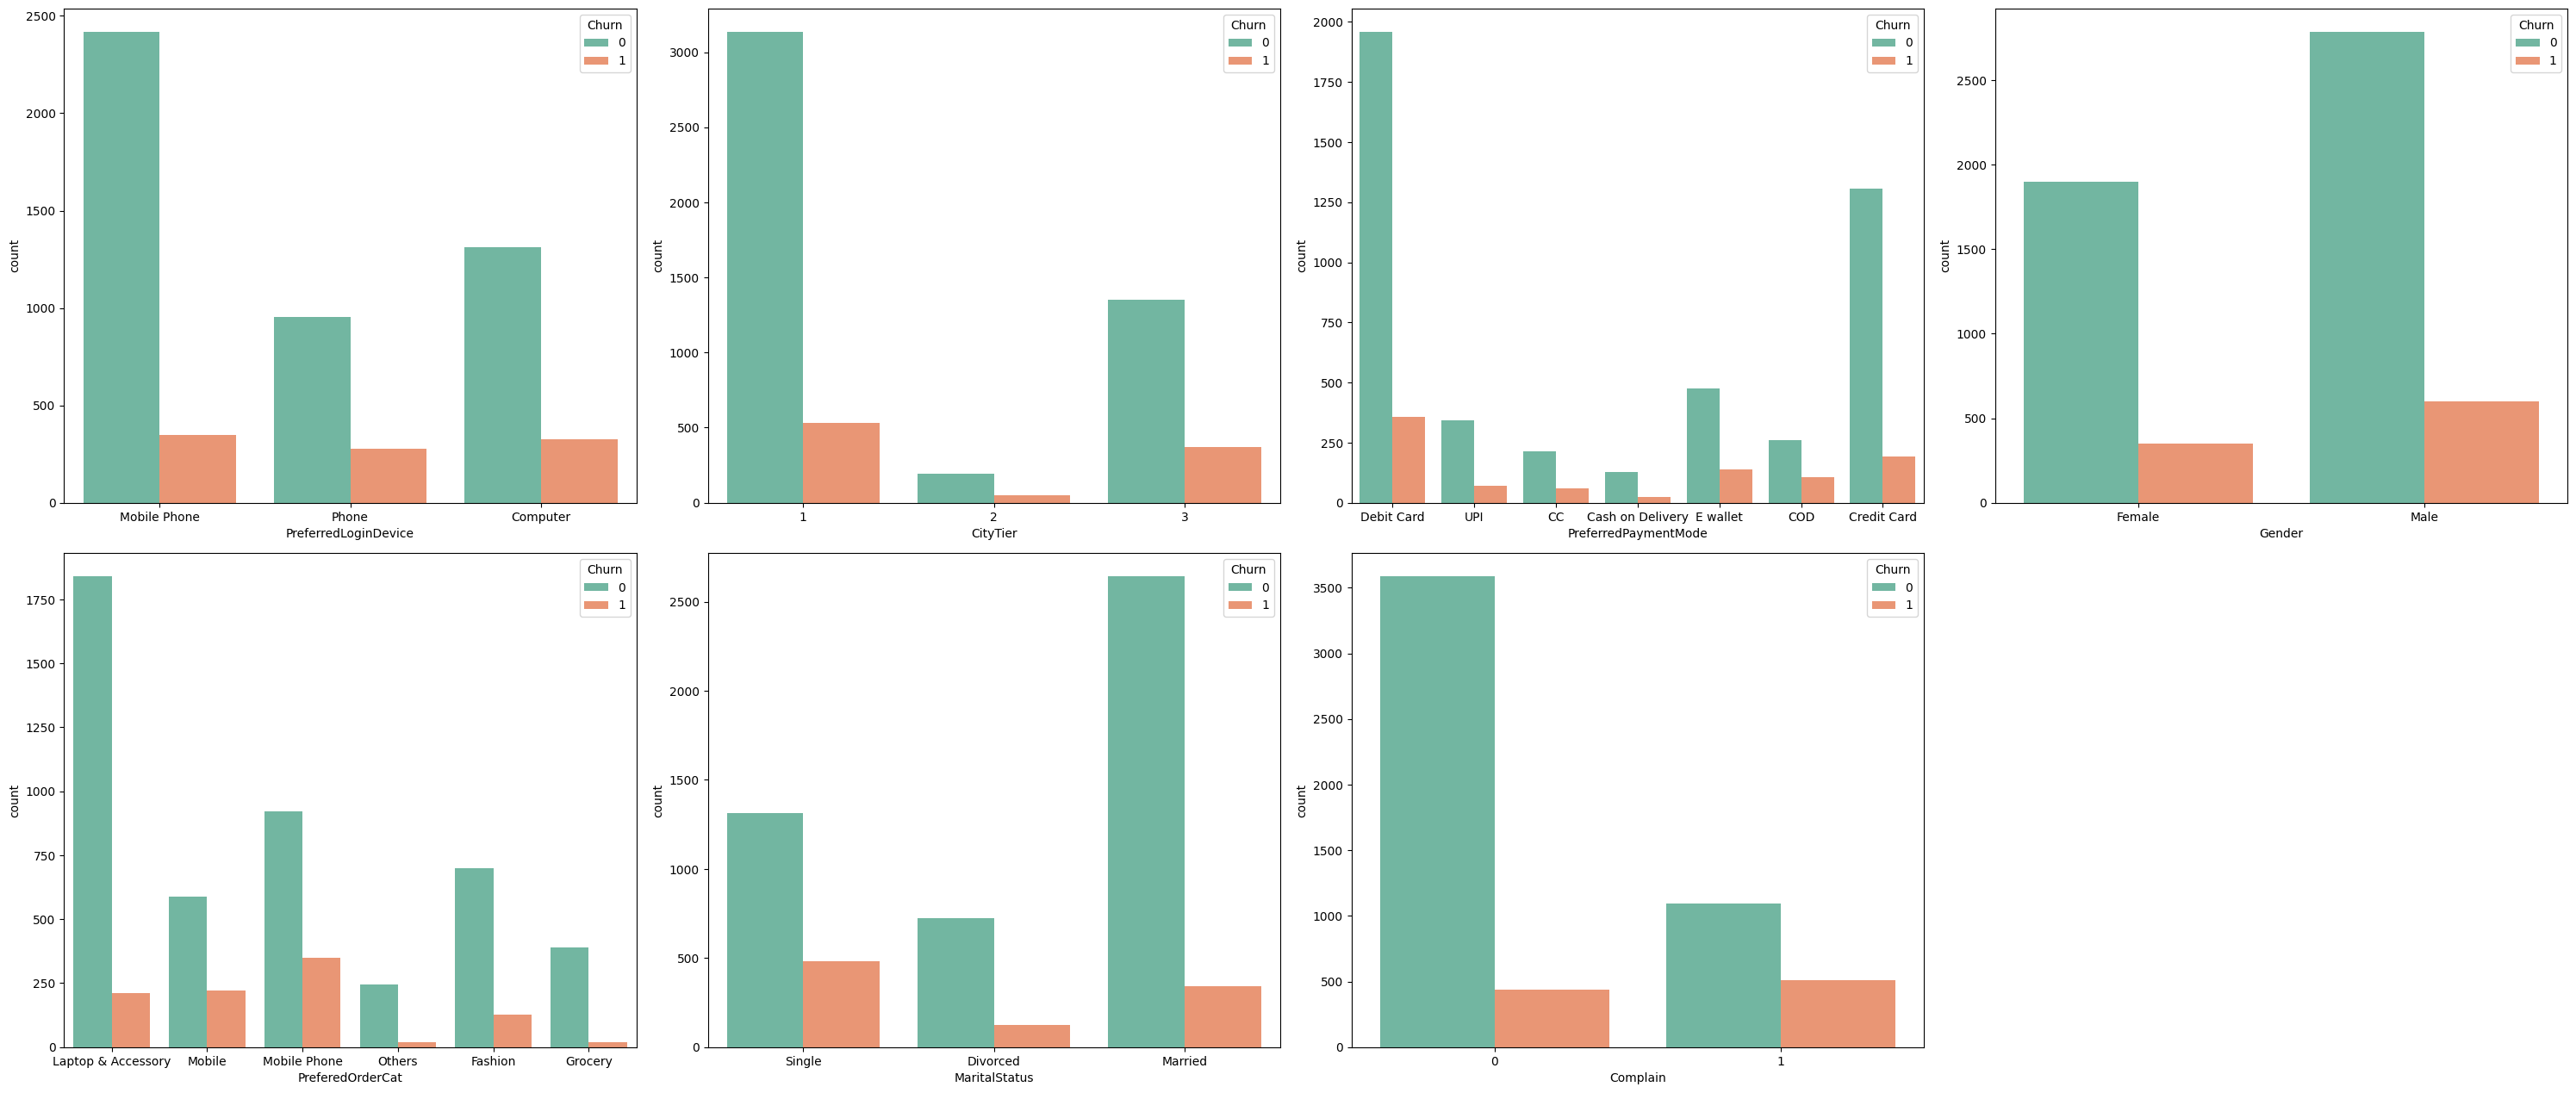

In [ ]:
plt.figure(figsize=(30,25))
plot_num = 1
palette = sns.color_palette("Set2", n_colors=2)
for col in cat_col:
    if df[col].nunique() <= 8 and col != "Churn":
        plt.subplot(4, 4, plot_num)
        sns.countplot(data=df_clean, x=col, hue="Churn", palette=palette)
        plt.legend(title="Churn", loc="upper right")
        plot_num += 1
plt.tight_layout()
plt.show()

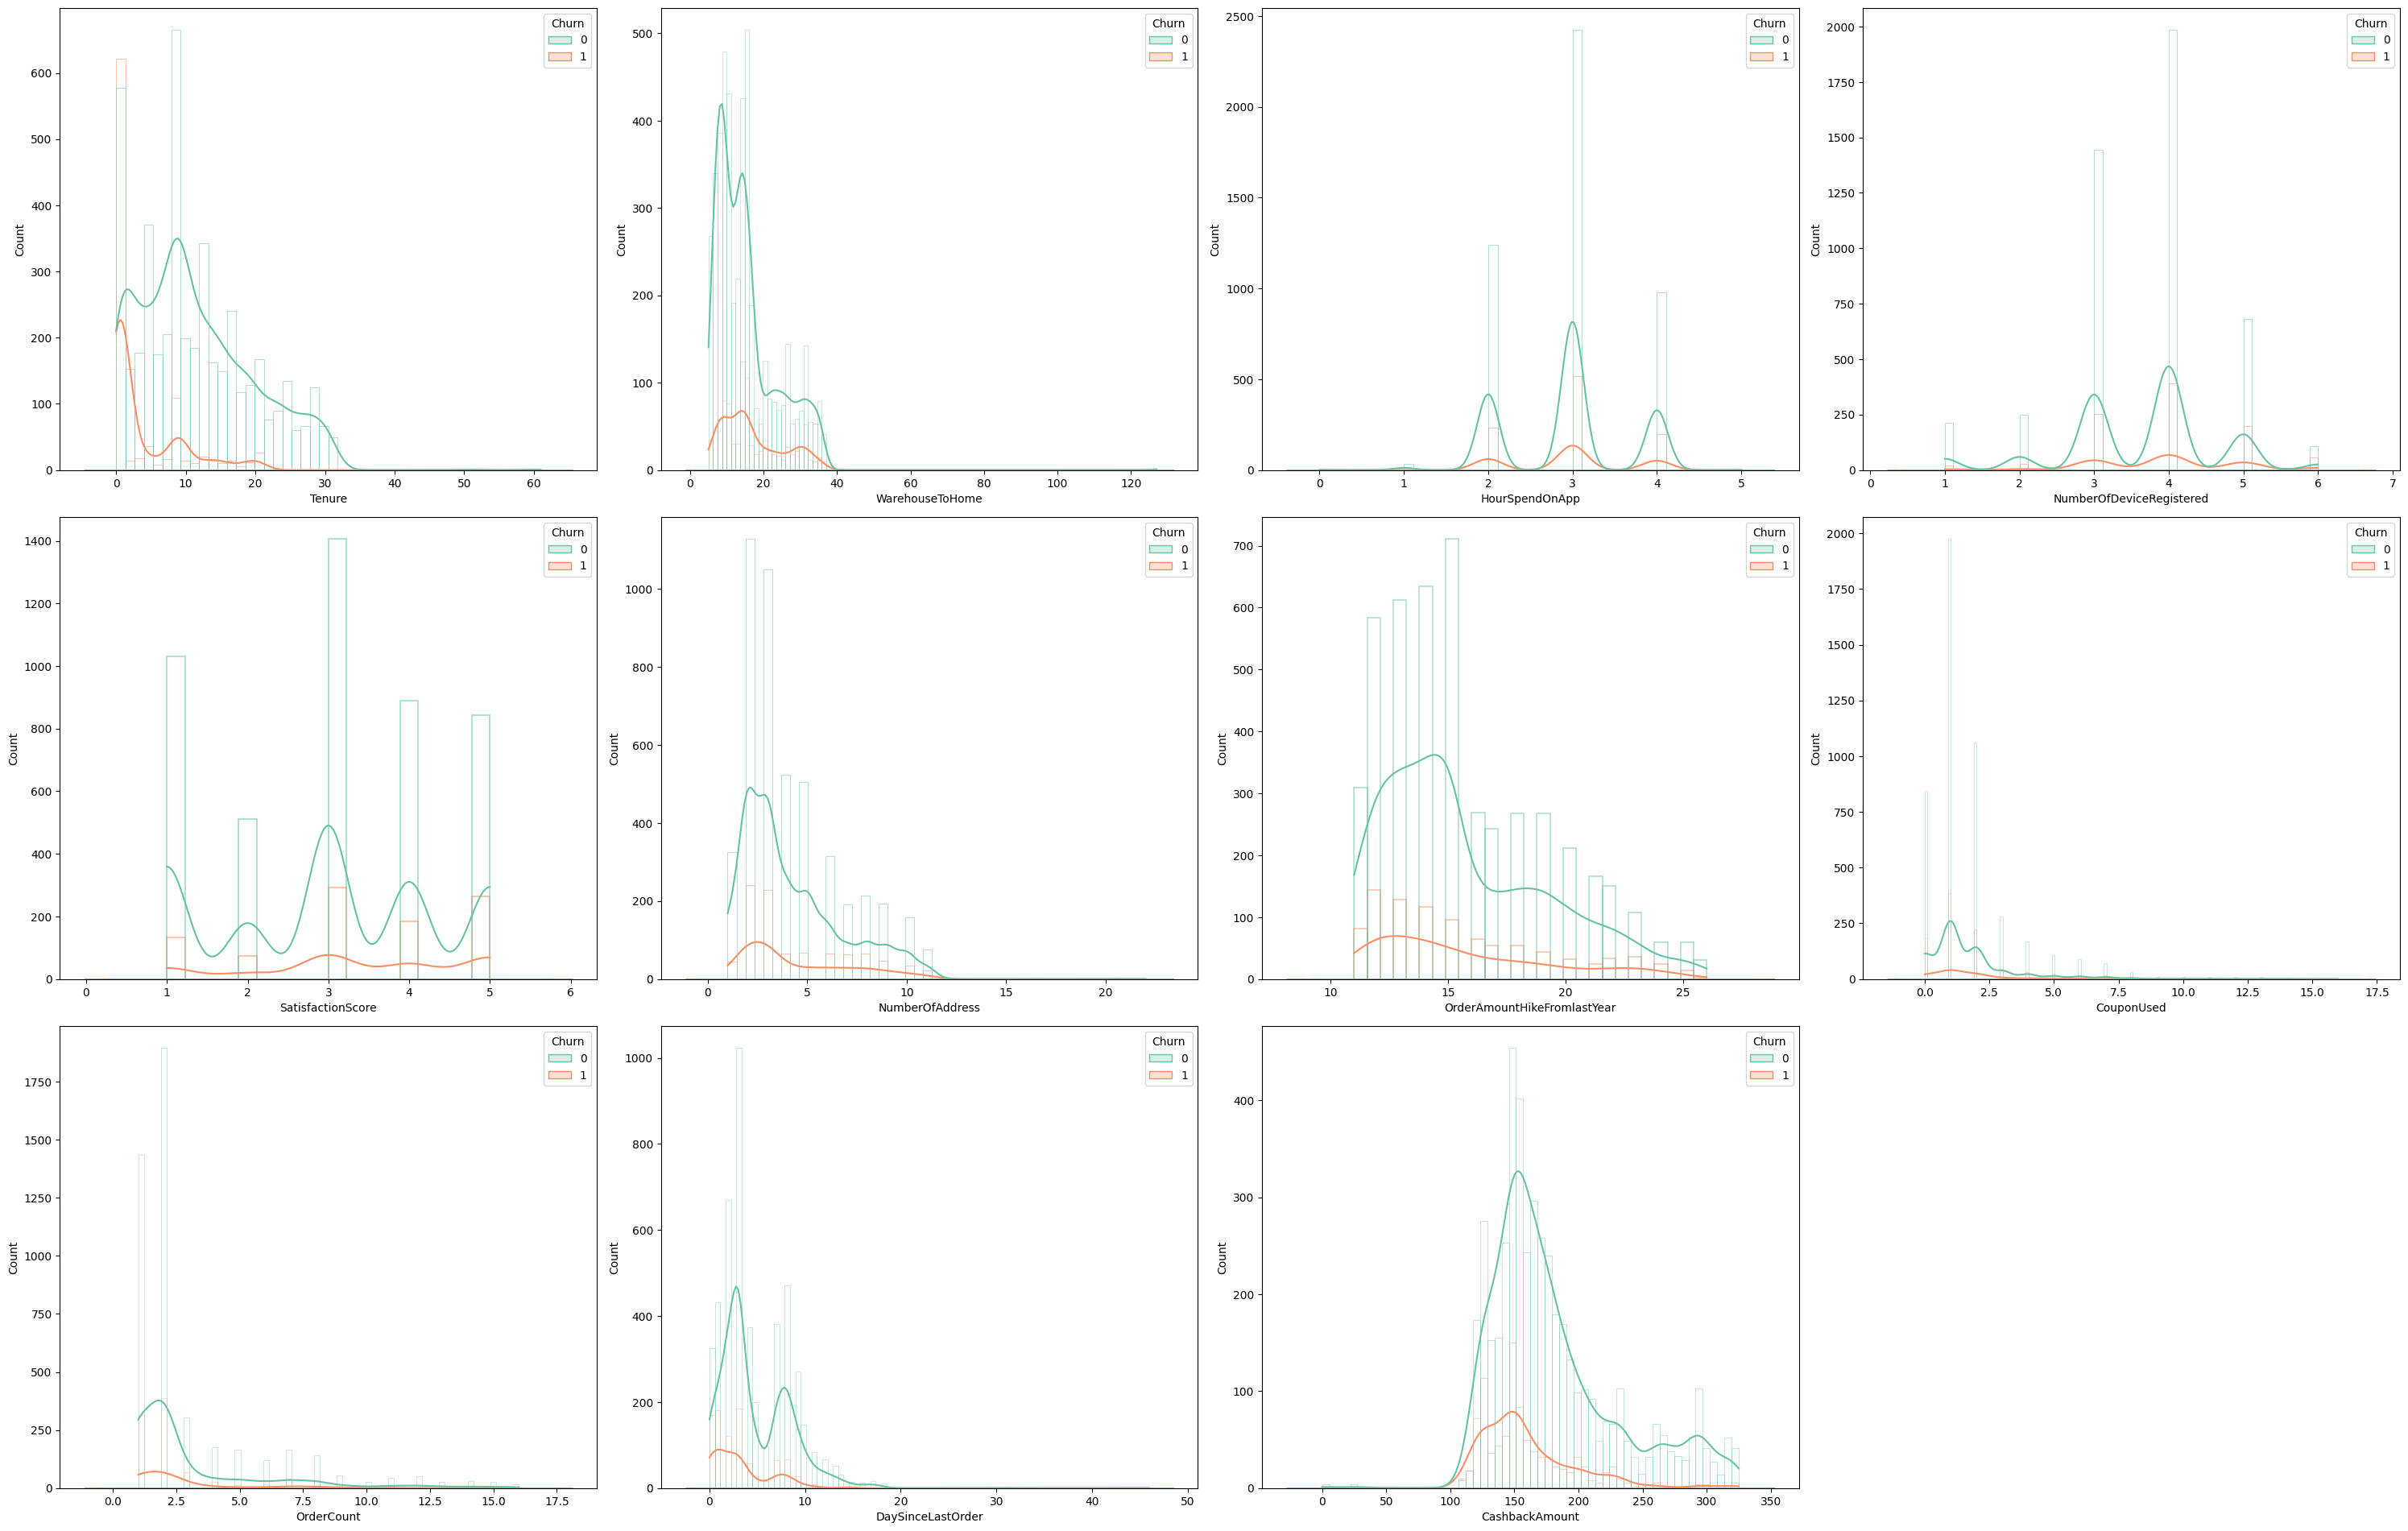

In [ ]:
plt.figure(figsize=(30,25))
plot_num = 1
palette = sns.color_palette("Set2", n_colors=2)

for col in num_col:
    plt.subplot(4, 4, plot_num)
    sns.histplot(data=df_clean, x=col, hue="Churn", palette=palette, kde=True, fill=False, alpha=0.5)
    sns.kdeplot(data=df_clean, x=col, hue="Churn", palette=palette, fill=True)
    plot_num += 1

plt.tight_layout()
plt.show()

#Modeling Method

In [ ]:
ecom = df_clean.copy()

In [ ]:
ecom_num = ecom.select_dtypes('number')
ecom_num.drop(columns='CustomerID', inplace=True)
ecom_num

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,3.0,2,1,6,0,18.0,1.0,2.0,4.0,150.71
5626,0,13.0,1,13.0,3.0,5,5,6,0,16.0,1.0,2.0,3.0,224.91
5627,0,1.0,1,11.0,3.0,2,4,3,1,21.0,1.0,2.0,4.0,186.42
5628,0,23.0,3,9.0,4.0,5,4,4,0,15.0,2.0,2.0,9.0,178.90


In [ ]:
ecom_obj = ecom.select_dtypes('object')
ecom_cat = pd.get_dummies(ecom_obj).astype(int)
ecom_cat.drop(columns='Gender_Male', inplace=True)
ecom_cat

,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
5626,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
5627,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
5628,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
ecom_prep = pd.concat([ecom_num, ecom_cat], axis=1)
ecom_prep

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount,PreferredLoginDevice_Computer,PreferredLoginDevice_Mobile Phone,PreferredLoginDevice_Phone,PreferredPaymentMode_CC,PreferredPaymentMode_COD,PreferredPaymentMode_Cash on Delivery,PreferredPaymentMode_Credit Card,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Female,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9,1,11.0,1.0,1.0,5.0,159.93,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1
1,1,9.0,1,8.0,3.0,4,3,7,1,15.0,0.0,1.0,0.0,120.90,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,1,9.0,1,30.0,2.0,4,3,6,1,14.0,0.0,1.0,3.0,120.28,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
3,1,0.0,3,15.0,2.0,4,5,8,0,23.0,0.0,1.0,3.0,134.07,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
4,1,0.0,1,12.0,3.0,3,5,3,0,11.0,1.0,1.0,3.0,129.60,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5625,0,10.0,1,30.0,3.0,2,1,6,0,18.0,1.0,2.0,4.0,150.71,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
5626,0,13.0,1,13.0,3.0,5,5,6,0,16.0,1.0,2.0,3.0,224.91,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
5627,0,1.0,1,11.0,3.0,2,4,3,1,21.0,1.0,2.0,4.0,186.42,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
5628,0,23.0,3,9.0,4.0,5,4,4,0,15.0,2.0,2.0,9.0,178.90,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


> Decision tree

In [ ]:
from sklearn.model_selection import train_test_split
ecom_train, ecom_test = train_test_split(ecom_prep, test_size=0.3)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(min_samples_leaf=10, max_depth=4)
tree.fit(ecom_train.drop(columns='Churn'),
         ecom_train['Churn'])

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)

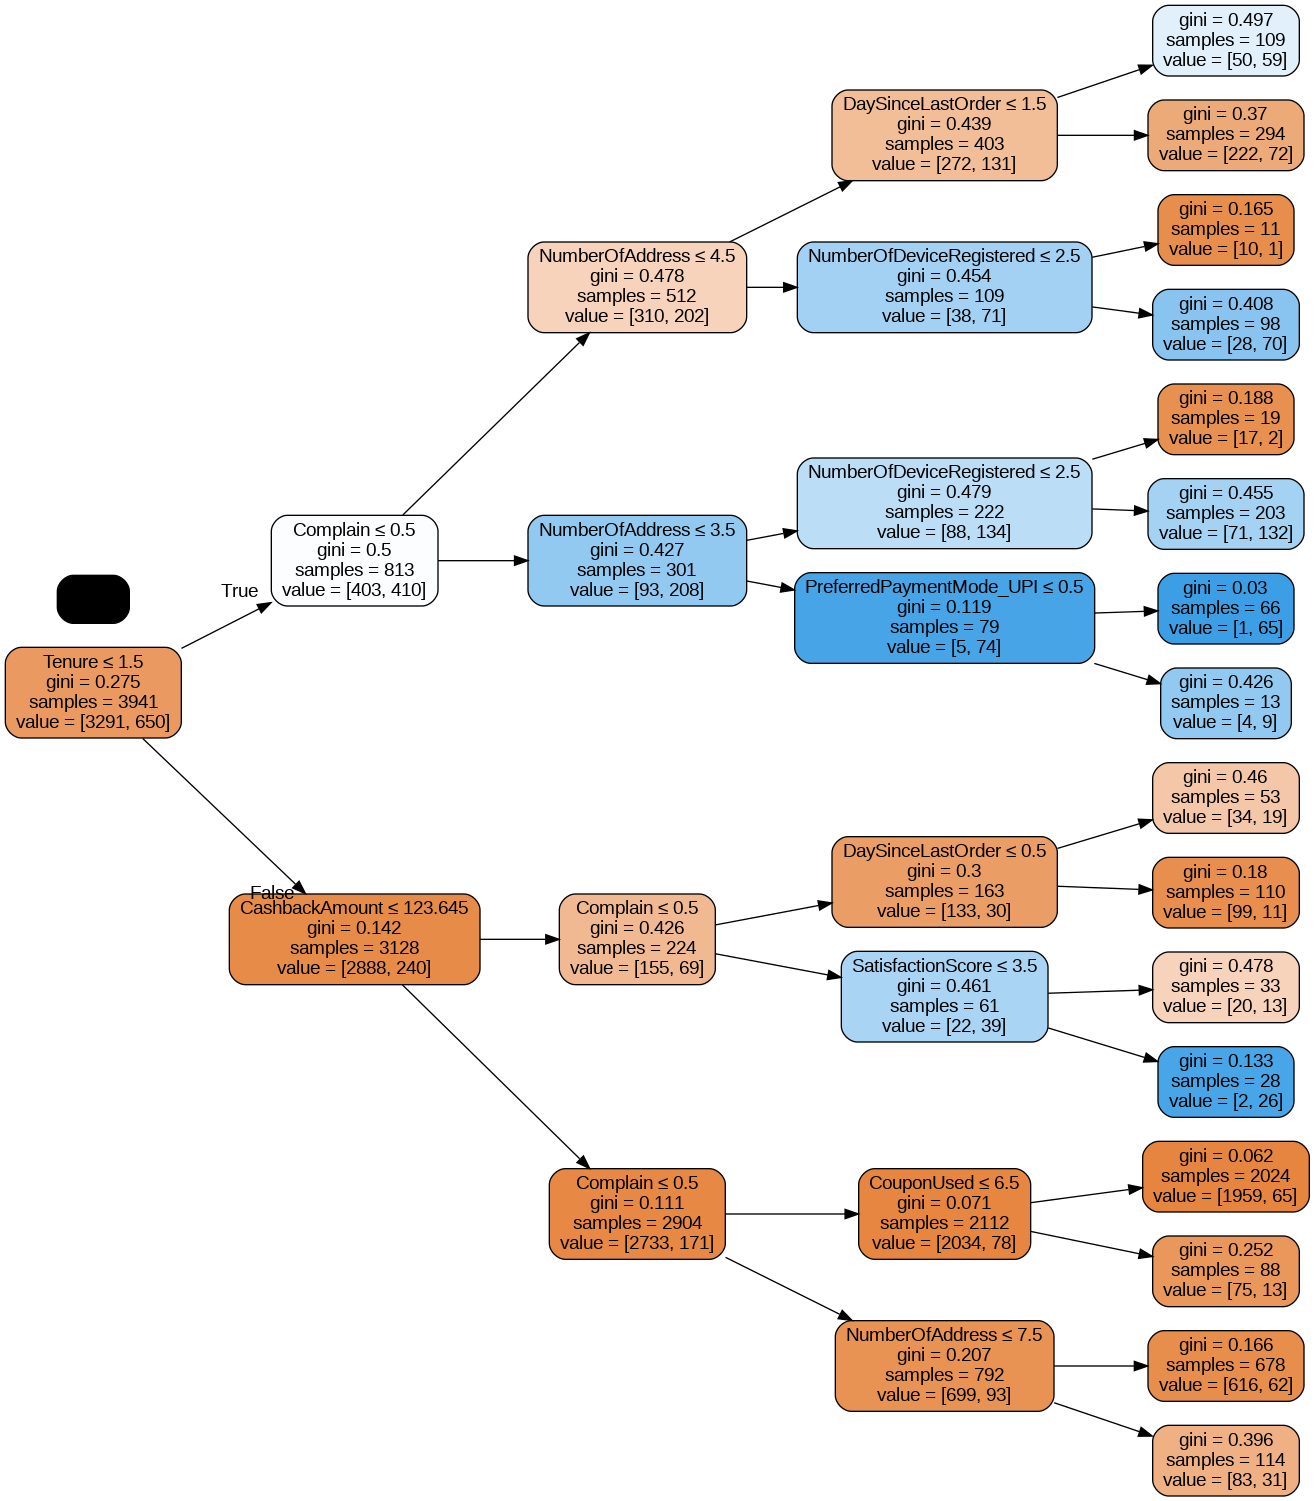

In [ ]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,
                rotate=True,
                feature_names=ecom_train.columns[1:])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('tree.png')
Image(graph.create_png())

In [ ]:
ecom_train.columns[1:]

Index(['Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Mobile Phone', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_CC', 'PreferredPaymentMode_COD',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'],
      dtype='object')

In [ ]:
tree.feature_importances_

array([0.57822936, 0.        , 0.        , 0.        , 0.04412876,
       0.02122117, 0.09204583, 0.14506976, 0.        , 0.00552493,
       0.        , 0.04595107, 0.06327349, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00455565, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

In [ ]:
pd.DataFrame(dict(Feature=ecom_train.columns[1:],
                  Value=tree.feature_importances_))\
  .sort_values(by='Value', ascending=False)

,Feature,Value
0,Tenure,0.578229
7,Complain,0.145070
6,NumberOfAddress,0.092046
12,CashbackAmount,0.063273
11,DaySinceLastOrder,0.045951
4,NumberOfDeviceRegistered,0.044129
5,SatisfactionScore,0.021221
9,CouponUsed,0.005525
22,PreferredPaymentMode_UPI,0.004556
26,PreferedOrderCat_Laptop & Accessory,0.000000


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
res = tree.predict(ecom_test.drop(columns='Churn'))
print(classification_report(y_true=ecom_test['Churn'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94      1391
           1       0.72      0.65      0.69       298

    accuracy                           0.89      1689
   macro avg       0.82      0.80      0.81      1689
weighted avg       0.89      0.89      0.89      1689



In [ ]:
pd.crosstab(ecom['Churn'], columns='p', normalize=True)

col_0,p
Churn,
0,0.831616
1,0.168384


In [ ]:
pd.crosstab(index=res,columns=ecom_test['Churn'])

Churn,0,1
row_0,,
0,1315,103
1,76,195


> Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lrg = LogisticRegression(solver='lbfgs', max_iter=10000)
lrg.fit(ecom_train.drop(columns='Churn'),
         ecom_train['Churn'])

LogisticRegression(max_iter=10000)

In [ ]:
res = lrg.predict(ecom_test.drop(columns='Churn'))
print(classification_report(y_true=ecom_test['Churn'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1391
           1       0.84      0.54      0.66       298

    accuracy                           0.90      1689
   macro avg       0.87      0.76      0.80      1689
weighted avg       0.90      0.90      0.89      1689



> K-neighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()
knn.fit(ecom_train.drop(columns='Churn'),
         ecom_train['Churn'])

KNeighborsClassifier()

In [ ]:
res = knn.predict(ecom_test.drop(columns='Churn'))
print(classification_report(y_true=ecom_test['Churn'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.90      0.95      0.92      1391
           1       0.68      0.48      0.56       298

    accuracy                           0.87      1689
   macro avg       0.79      0.72      0.74      1689
weighted avg       0.86      0.87      0.86      1689



> Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rf = RandomForestClassifier(
      criterion='gini',
      n_estimators=100,
      random_state=1,
      bootstrap=True
)
rf.fit(ecom_train.drop(columns='Churn'),
         ecom_train['Churn'])

RandomForestClassifier(random_state=1)

In [ ]:
res = rf.predict(ecom_test.drop(columns='Churn'))
print(classification_report(y_true=ecom_test['Churn'].values, y_pred=res))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1391
           1       0.95      0.82      0.88       298

    accuracy                           0.96      1689
   macro avg       0.96      0.91      0.93      1689
weighted avg       0.96      0.96      0.96      1689



In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

In [ ]:
cfm = confusion_matrix(ecom_test['Churn'], res)
print(cfm)

[[1378   13]
 [  53  245]]


<Figure size 2000x1500 with 0 Axes>

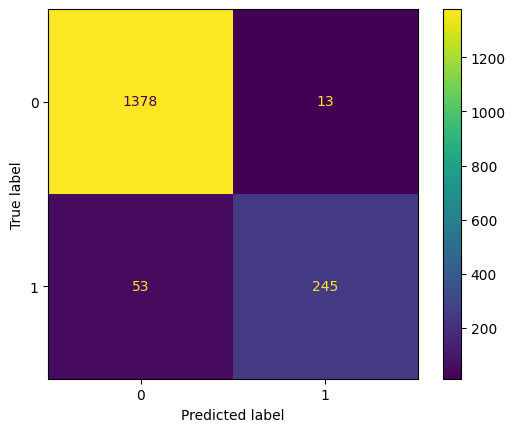

In [ ]:
plt.figure(figsize=(20,15))
cm_display = ConfusionMatrixDisplay(confusion_matrix = cfm, display_labels = [0, 1])

cm_display.plot()
plt.show()